In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, Ridge, LinearRegression, LassoCV, Lasso, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import svm
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold 

In [2]:
df = pd.read_csv('stats.csv')
df.head(n=10)
#split the last_name,first_name column to be two sepearate columns 1 for first name, 1 for last name by first creating a full_name column then splitting
df[['full_name']]= df[['last_name, first_name']]
df[['last_name','first_name']]=df.full_name.str.split(', ',expand=True)

#drop the original last_name,first_name columns 
df.drop('last_name, first_name',axis = 1,inplace=True)

print(f'There are {len(df)} observations made on {len(df.columns)} features considered in this dataset. ' +
      f' \n ' +
      f'Those features are: ' +
      f' \n')
    
for column in df.columns:
    print(column)

print(f'\n Feature of interest: on_base_plus_slg')

There are 538 observations made on 25 features considered in this dataset.  
 Those features are:  

player_id
year
pa
hit
single
double
triple
home_run
k_percent
bb_percent
on_base_plus_slg
exit_velocity_avg
sweet_spot_percent
barrel_batted_rate
solidcontact_percent
hard_hit_percent
avg_best_speed
avg_hyper_speed
whiff_percent
swing_percent
groundballs_percent
flyballs_percent
full_name
last_name
first_name

 Feature of interest: on_base_plus_slg


In [3]:
df.drop('last_name',axis=1,inplace=True)
df.drop('full_name',axis=1,inplace=True)
df.drop('first_name',axis=1,inplace=True)
df.drop("player_id", axis=1, inplace=True)

In [4]:
print(f'\n Checking for missing (Na) values: \n ')
print(f'{df.isna().sum()}')
print(f'\n Checking for duplicated values: \n ')
print(f'{df.duplicated().sum()}')


 Checking for missing (Na) values: 
 
year                    0
pa                      0
hit                     0
single                  0
double                  0
triple                  0
home_run                0
k_percent               0
bb_percent              0
on_base_plus_slg        0
exit_velocity_avg       0
sweet_spot_percent      0
barrel_batted_rate      0
solidcontact_percent    0
hard_hit_percent        0
avg_best_speed          0
avg_hyper_speed         0
whiff_percent           0
swing_percent           0
groundballs_percent     0
flyballs_percent        0
dtype: int64

 Checking for duplicated values: 
 
0


In [5]:
train_df = df[(df['year'] == 2021) | (df['year'] == 2020)]
val_df = df[df.year==2022]
test_df = df[df.year==2023]


model = LinearRegression()

scaler = StandardScaler()

# Train data
X_train = train_df.loc[:, train_df.columns!="on_base_plus_slg"]
y_train = train_df["on_base_plus_slg"]
X_train_scaled = scaler.fit_transform(X_train)  # Scale training data

model.fit(X_train_scaled, y_train)

# Validation
X_val = val_df.loc[:, val_df.columns!="on_base_plus_slg"]
y_val = val_df["on_base_plus_slg"]
X_val_scaled = scaler.transform(X_val)  # Scale validation data

validation_score = model.score(X_val_scaled, y_val)
print(f"The validation score is {validation_score}")

# Testing
X_test = test_df.loc[:, test_df.columns!="on_base_plus_slg"]
y_test = test_df["on_base_plus_slg"]
X_test_scaled = scaler.transform(X_test)  # Scale testing data

test_score = model.score(X_test_scaled, y_test)
print(f"The test score is {test_score}")


The validation score is 0.8188072421681414
The test score is 0.626917449319472


# Ridge Regression

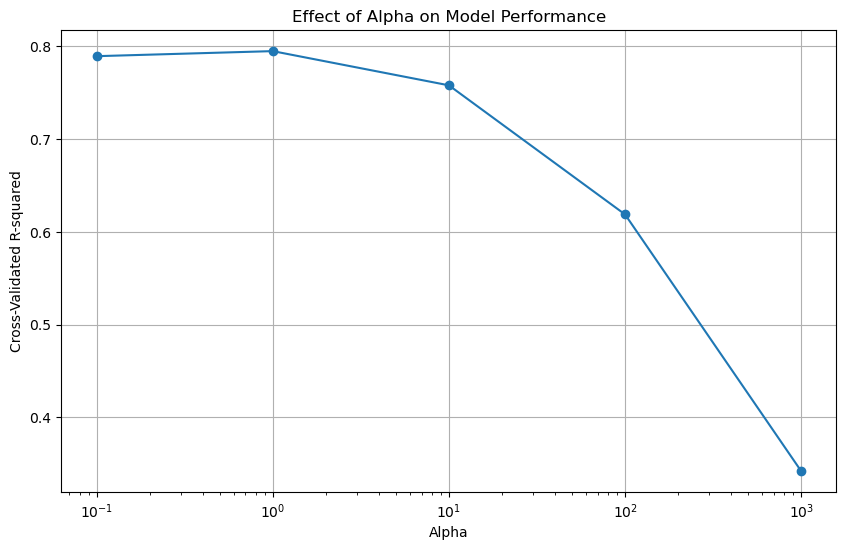

The best ridge cross val score is 0.9461959739723704
The best alpha is 0.1


In [18]:
alphas = np.array([0.1, 1.0, 10.0, 100, 1000])

cv_scores = []


# Perform 5-fold cross-validation for each alpha
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    scores = cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='r2')
    cv_scores.append(np.mean(scores))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(alphas, cv_scores, marker='o')
plt.xscale('log')  
plt.xlabel('Alpha')
plt.ylabel('Cross-Validated R-squared')
plt.title('Effect of Alpha on Model Performance')
plt.grid(True)
plt.show()

ridge_cv= RidgeCV(alphas=[0.1, 1.0, 10.0, 100, 1000])

ridge_cv.fit(X_train_scaled, y_train)

best_alpha = ridge_cv.alpha_

ridge= Ridge(alpha=best_alpha)
ridge.fit(X_train_scaled, y_train)

print(f"The best ridge cross val score is {cross_val_score(ridge, X_test_scaled, y_test, cv=5).mean()}")

print(f"The best alpha is {best_alpha}")

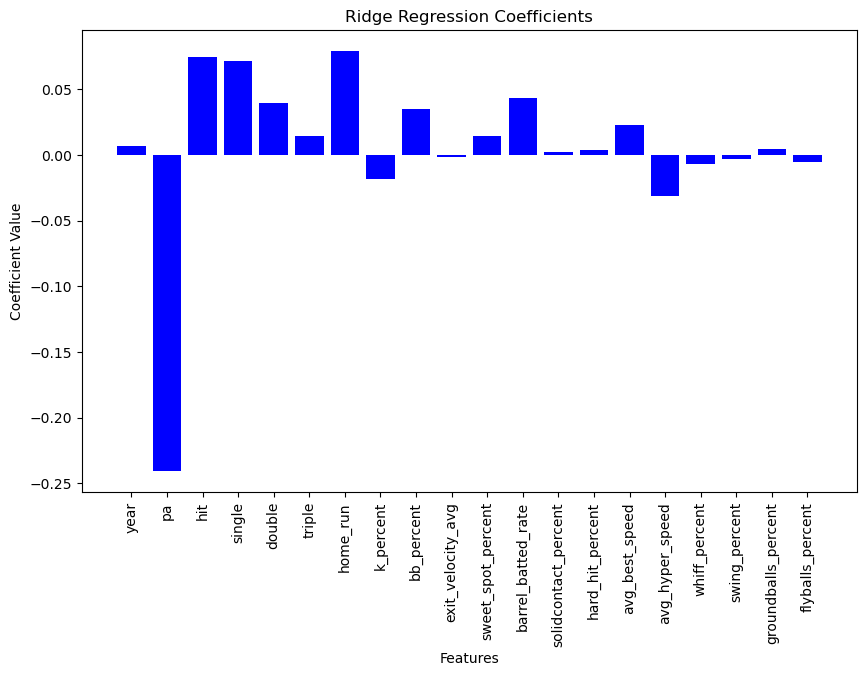

In [20]:
plt.figure(figsize=(10, 6))
plt.bar(list(X_train.columns), list(ridge.coef_), color='blue')


plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Coefficients')
plt.show()

# Test out Ridge Modeling

In [23]:
# Features
features = ["pa", "hit", "single", "double", "home_run", "bb_percent", "barrel_batted_rate"]

scaler = StandardScaler()

# Train it and also standardize
X_train_scaled = scaler.fit_transform(train_df[features])
y_train = train_df["on_base_plus_slg"]  

model = Ridge(alpha=best_alpha)  
model.fit(X_train, y_train)
print(f"The training score is {cross_val_score(model, X_train_scaled, y_train, cv=5).mean()}")

X_test = test_df[features]
X_test_scaled = scaler.transform(X_test)  
y_test = test_df["on_base_plus_slg"]  


print(f"The testing score is {cross_val_score(model, X_test_scaled, y_test, cv=5).mean()}")


The training score is 0.7475326723484791
The testing score is 0.9410172360196576


# Lasso

In [ ]:
# Using LassoCV to find the best alpha
lasso_cv = LassoCV(alphas=[0.1, 1.0, 10.0, 100, 1000, 10000, 1000000])
lasso_cv.fit(X_train_scaled, y_train)

best_alpha = lasso_cv.alpha_

# Using Lasso with the best alpha found by LassoCV
final_lasso = Lasso(alpha=best_alpha)
(cross_val_score(final_lasso, X_train_scaled, y_train, cv=5, scoring='r2')).mean()

# Scoring the model on the test set
print(f"The best Lasso score is {(cross_val_score(final_lasso, X_train_scaled, y_train, cv=5, scoring='r2')).mean()}")
print(f"The best alpha is {best_alpha}")

# Graph of Lasso with Standardization

In [ ]:
alphas = np.array([0.1, 1.0, 10.0, 100, 1000])


cv_scores = []
# Perform 5-fold cross-validation for each alpha
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    scores = cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='r2')  # Explicitly using R^2
    cv_scores.append(np.mean(scores))

# Plotting the effect of alpha on model performance
plt.figure(figsize=(10, 6))
plt.plot(alphas, cv_scores, marker='o')
plt.xscale('log')  
plt.xlabel('Alpha')
plt.ylabel('Cross-Validated R-squared')
plt.title('Effect of Alpha on Model Performance')
plt.grid(True)
plt.show()

# Lasso Without Standardization

In [ ]:
X_train = train_df.loc[:, train_df.columns!="on_base_plus_slg"]
X_test = test_df.loc[:, test_df.columns!="on_base_plus_slg"]

lasso_cv = LassoCV(alphas=[0.1, 0.5, 1.0, 10, 100, 1000])

lasso_cv.fit(X_train, y_train)
best_alpha= lasso_cv.alpha_

lasso= Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)

lasso_coefs = lasso.coef_

non_zero_indices = [i for i, coef in enumerate(lasso_coefs) if coef != 0]

# Get the names of features with non-zero coefficients
selected_features = train_df.columns[non_zero_indices]

# Get the names of features with zero coefficients (removed features)
zero_indices = [i for i, coef in enumerate(lasso_coefs) if coef == 0]
removed_features = train_df.columns[zero_indices]

print("Selected features:")
print(selected_features)

print("Removed features:")

print(removed_features)


print(f"The best alpa is {best_alpha} and the best Lasso score is {(cross_val_score(lasso, X_train, y_train, cv=5, scoring='r2')).mean()}")



X_train=train_df[selected_features]

model= LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

# Decision Tree Regressor
* Decision tree regression may not be the best method as its score is relatively low

In [ ]:
model= DecisionTreeRegressor()

model.fit(X_train_scaled, y_train)
y_pred=model.predict(X_test_scaled)


from sklearn.metrics import mean_absolute_error

# Assuming y_pred and y_test are your predicted and true labels, respectively
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)



# Gradient Boosting

In [ ]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)


# Fit the model
gb.fit(X_train_scaled, y_train)

# Predict test data
y_pred = gb.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r_squared = gb.score(X_test_scaled, y_test)
print("R-squared:", r_squared)

feature_importances = gb.feature_importances_


plt.figure(figsize=(10, 6))

plt.bar(list(X_train.columns), list(feature_importances), color='blue')


plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('GBR Coefficients')
plt.show()

In [ ]:
X_train = train_df.loc[:, train_df.columns!="on_base_plus_slg"]
X_test = test_df.loc[:, test_df.columns!="on_base_plus_slg"]
features= ["pa", "hit", "single", "k_percent", "bb_percent", "barrel_batted_rate"]
#Train it and also standardize
X_train=scaler.fit_transform(train_df[features])


gb = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

gb.fit(X_train, y_train)
gb.score(X_train, y_train)


X_test= scaler.transform(X_test[features])

gb.score(X_test, y_test)